In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, markers, fancy_legend, load_mpl_presets
import vice
import numpy as np
import sys
import os
print(sys.version_info)
load_mpl_presets()

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_31036/3171449750.py:54: ScienceWarning: The Limongi & Chieffi (2018), ApJS, 237, 13 study published only the results which adopted a fixed yield of nickel-56, and these are the yields which are
installed in this version of VICE. For this reason, we caution the user on these yields of iron peak elements.
  yfe, err = vice.yields.ccsne.fractional('fe', **kwargs)


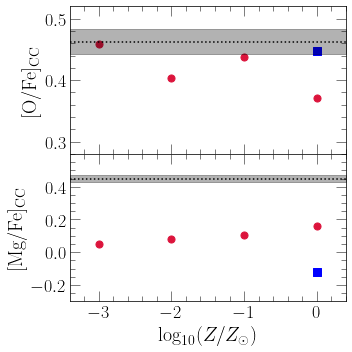

In [28]:
fig = plt.figure(figsize = (5, 5), facecolor = "white")
axes = []
for i in range(2):
    axes.append(fig.add_subplot(211 + i))
    axes[i].set_ylabel(r"[%s/Fe]$_\text{CC}$" % (["O", "Mg"][i]))
    axes[i].set_xlim([-3.4, 0.4])
axes[1].set_xlabel(r"$\log_{10}(Z / Z_\odot)$")
plt.setp(axes[0].get_xticklabels(), visible = False)
axes[0].set_ylim([0.28, 0.52])
axes[1].set_ylim([-0.3, 0.6])
axes[1].set_yticks([-0.2, 0, 0.2, 0.4])

bestfit_yfecc = 7.78e-4
bestfit_yfecc_upper = 7.78e-4 + 3.7e-5
bestfit_yfecc_lower = 7.78e-4 - 3.8e-5
studies = ["LC18", "S16/W18"]
MoverH = {
    "LC18": [-3, -2, -1, 0],
    "S16/W18": [0],
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55],
    "WW95": [-4, -2, -1, 0]
}
rotation = {
    "LC18": [0],
    "S16/W18": [0],
    "NKT13": [0],
    "WW95": [0]
}
# pointstyles = {
#     0: "triangle_up",
#     150: "circle",
#     300: "star"
# }
pointstyles = {
    "LC18": "circle",
    "S16/W18": "square"
}
colors = {
    "LC18": "crimson",
    "S16/W18": "blue",
    "NKT13": "lime",
    "WW95": "black"
}
for study in studies:
    for met in MoverH[study]:
        for rot in rotation[study]:
            kwargs = {
                "study": study,
                "MoverH": met,
                "rotation": rot
            }
            yo, err = vice.yields.ccsne.fractional('o', **kwargs)
            ymg, err = vice.yields.ccsne.fractional('mg', **kwargs)
            yfe, err = vice.yields.ccsne.fractional('fe', **kwargs)
            ofe_cc = np.log10(yo / yfe) - np.log10(vice.solar_z['o'] / vice.solar_z['fe'])
            mgfe_cc = np.log10(ymg / yfe) - np.log10(vice.solar_z['mg'] / vice.solar_z['fe'])
            kwargs = {
                "marker": markers()[pointstyles[study]],
                "c": named_colors()[colors[study]], 
                "s": 50
            }
            axes[0].scatter(met, ofe_cc, **kwargs)
            axes[1].scatter(met, mgfe_cc, **kwargs)
            
kwargs = {
    "linestyle": ':',
    "color": named_colors()["black"]
}

def plateau_height(elem, feyield):
    y = {'o': 0.01, 'mg': 1.2e-3}[elem]
    return np.log10(y / feyield) - np.log10(vice.solar_z[elem] / vice.solar_z['fe'])

axes[0].axhline(plateau_height('o', bestfit_yfecc), **kwargs)
axes[1].axhline(plateau_height('mg', bestfit_yfecc), **kwargs)
axes[0].fill_between(axes[0].get_xlim(), plateau_height('o', bestfit_yfecc_lower),
    plateau_height('o', bestfit_yfecc_upper), color = named_colors()["black"], alpha = 0.3)
axes[1].fill_between(axes[1].get_xlim(), plateau_height('mg', bestfit_yfecc_lower),
    plateau_height('mg', bestfit_yfecc_upper), color = named_colors()["black"], alpha = 0.3)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.show()

In [19]:
1.75 * vice.solar_z['mg']

0.0012355

In [33]:
vice.yields.ccsne.fractional('o', study = "NKT13", MoverH = 0.15)

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_31036/56687041.py:1: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
  vice.yields.ccsne.fractional('o', study = "NKT13", MoverH = 0.15)


[0.023142845636797863, 2.373316282645893e-05]